# 資料預處理

In [27]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [76]:
y_train_label=np.loadtxt('label.txt',delimiter=",")
x_Train=np.loadtxt('feature.txt',delimiter=",")

In [77]:
y_test_label=np.loadtxt('test_label.txt',delimiter=",")
x_Test=np.loadtxt('test_feature.txt',delimiter=",")

In [78]:
print(y_train_label.shape)
print(x_Train.shape)

(252,)
(252, 1001)


In [79]:
print(y_test_label.shape)
print(x_Test.shape)

(252,)
(252, 1001)


In [80]:
x_Train_normalize=[]
for i in x_Train:
    new_i = i/i.max()
    x_Train_normalize.append(new_i)
x_Train_normalize=np.array(x_Train_normalize)

In [81]:
x_Test_normalize=[]
for i in x_Test:
    new_i = i/i.max()
    x_Test_normalize.append(new_i)
x_Test_normalize=np.array(x_Test_normalize)

In [82]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [83]:
print(x_Test_normalize.shape)
print(x_Train_normalize.shape)

(252, 1001)
(252, 1001)


In [84]:
print(y_Train_OneHot.shape)
print(y_Test_OneHot.shape)

(252, 2)
(252, 2)


In [86]:
y_Test_OneHot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

# 建立模型

In [87]:
from keras.models import Sequential
from keras.layers import Dense

In [88]:
model = Sequential()

In [89]:
model.add(Dense(units=500, 
                input_dim=1001, 
                kernel_initializer='normal', 
                activation='relu'))

In [90]:
model.add(Dense(units=500, 
                kernel_initializer='normal', 
                activation='relu'))

In [91]:
model.add(Dense(units=2, 
                kernel_initializer='normal', 
                activation='softmax'))

In [92]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               501000    
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 1002      
Total params: 752,502
Trainable params: 752,502
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [93]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [94]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Epoch 1/10
2/2 - 0s - loss: 0.7418 - accuracy: 0.5025 - val_loss: 4.6342 - val_accuracy: 0.1569
Epoch 2/10
2/2 - 0s - loss: 0.0109 - accuracy: 1.0000 - val_loss: 6.8429 - val_accuracy: 0.1569
Epoch 3/10
2/2 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 7.7196 - val_accuracy: 0.1569
Epoch 4/10
2/2 - 0s - loss: 7.5031e-04 - accuracy: 1.0000 - val_loss: 8.2830 - val_accuracy: 0.1569
Epoch 5/10
2/2 - 0s - loss: 3.1133e-04 - accuracy: 1.0000 - val_loss: 8.6550 - val_accuracy: 0.1569
Epoch 6/10
2/2 - 0s - loss: 1.5337e-04 - accuracy: 1.0000 - val_loss: 8.9325 - val_accuracy: 0.1569
Epoch 7/10
2/2 - 0s - loss: 8.5627e-05 - accuracy: 1.0000 - val_loss: 9.1674 - val_accuracy: 0.1569
Epoch 8/10
2/2 - 0s - loss: 5.2675e-05 - accuracy: 1.0000 - val_loss: 9.3620 - val_accuracy: 0.1569
Epoch 9/10
2/2 - 0s - loss: 3.5114e-05 - accuracy: 1.0000 - val_loss: 9.5135 - val_accuracy: 0.1569
Epoch 10/10
2/2 - 0s - loss: 2.5016e-05 - accuracy: 1.0000 - val_loss: 9.6391 - val_accuracy: 0.1569


# 以圖形顯示訓練過程

In [95]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

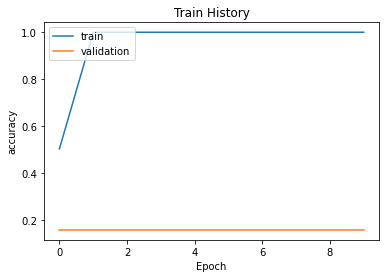

In [96]:
show_train_history(train_history,'accuracy','val_accuracy')

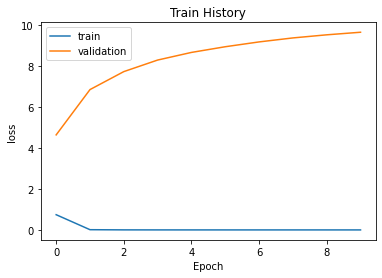

In [97]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [98]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

8/8 [==============================] - 0s 2ms/step - loss: 1.6803 - accuracy: 0.8254

accuracy= 0.8253968358039856


# 進行預測

In [99]:
prediction=model.predict_classes(x_Test)

In [100]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# confusion matrix

In [101]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0
label,
0.0,208
1.0,44


In [102]:
y_test_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.